In [3]:
from python.data.csr1_wjs0_dataset import speech_list
from python.processing.stft import stft
from python.processing.target import clean_speech_IBM
import soundfile as sf
import numpy as np


# Parameters
## Dataset
input_data_dir = '../data/subset/raw/'
output_data_dir = '../data/subset/processed/'
dataset_type = 'test'
fs = int(16e3) # Sampling rate

## STFT
wlen_sec = 64e-3 # window length in seconds
hop_percent = 0.25  # hop size as a percentage of the window length
win = 'hann' # type of window

## IBM
quantile_fraction = 0.98
quantile_weight = 0.999

## Plot spectrograms
vmin = -40 # in dB
vmax = 20 # in dB
xticks_sec = 2.0 # in seconds
fontsize = 30

# Create file list
file_paths = speech_list(input_data_dir=input_data_dir,
                            dataset_type=dataset_type)

path = file_paths[0]

x, fs_x = sf.read(input_data_dir + path, samplerate=None)
x = x/np.max(np.abs(x))
if fs != fs_x:
    raise ValueError('Unexpected sampling rate')

# TF reprepsentation
x_tf = stft(x,
            fs=fs,
            wlen_sec=wlen_sec,
            win=win,
            hop_percent=hop_percent)

# binary mask
x_ibm = clean_speech_IBM(x_tf,
                        quantile_fraction=quantile_fraction,
                        quantile_weight=quantile_weight)




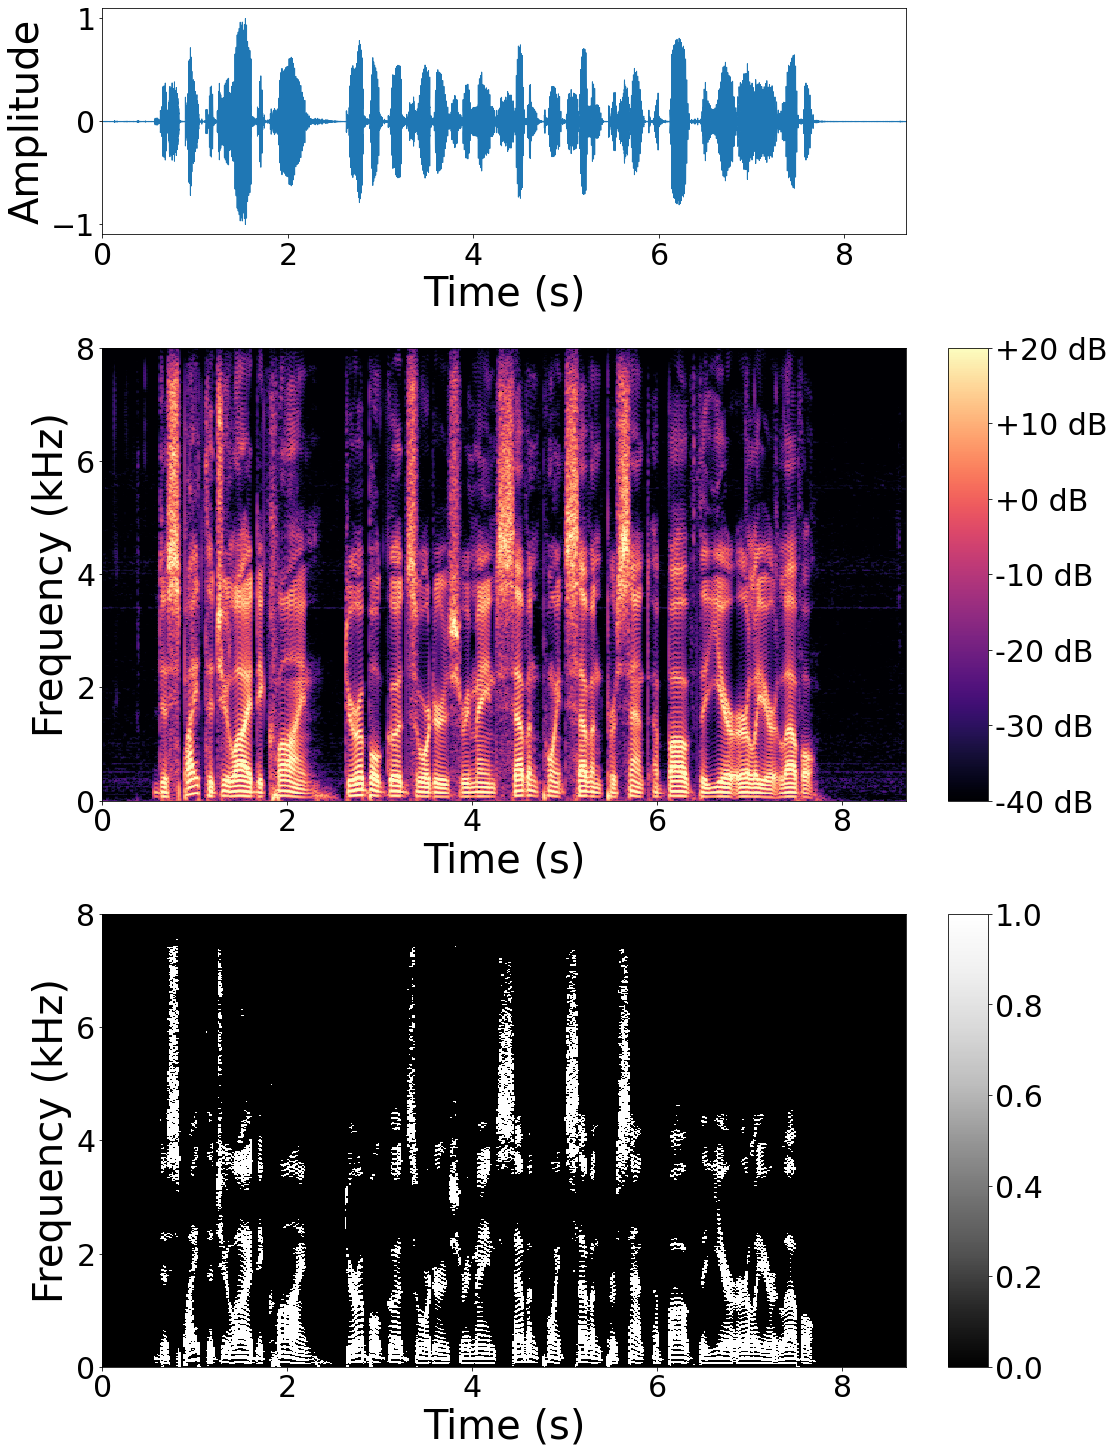

In [4]:
import matplotlib.pyplot as plt
from python.visualization import display_waveplot, display_spectrogram
import numpy as np
import matplotlib.gridspec as grd

fig = plt.figure(figsize=(15,25))

# create a 2 X 2 grid
gs = grd.GridSpec(3, 2,
                height_ratios=[5,10,10],
                width_ratios=[10,0.5],
                wspace=0.1,
                hspace=0.3,
                left=0.08)

# line plot
ax = plt.subplot(gs[0])
display_waveplot(x, fs, xticks_sec, fontsize)

# image plot
ax = plt.subplot(gs[2])
display_spectrogram(x_tf, True, vmin, vmax, fs, wlen_sec, hop_percent, xticks_sec, 'magma', fontsize)

# color bar in it's own axis
colorAx = plt.subplot(gs[3])
cbar = plt.colorbar(cax=colorAx, format='%+2.0f dB')

# image plot
ax = plt.subplot(gs[4])
display_spectrogram(x_ibm, False, 0, 1, fs, wlen_sec, hop_percent, xticks_sec, 'Greys_r', fontsize)

# color bar in it's own axis
colorAx = plt.subplot(gs[5])
plt.colorbar(cax=colorAx, format='%0.1f')

plt.show()